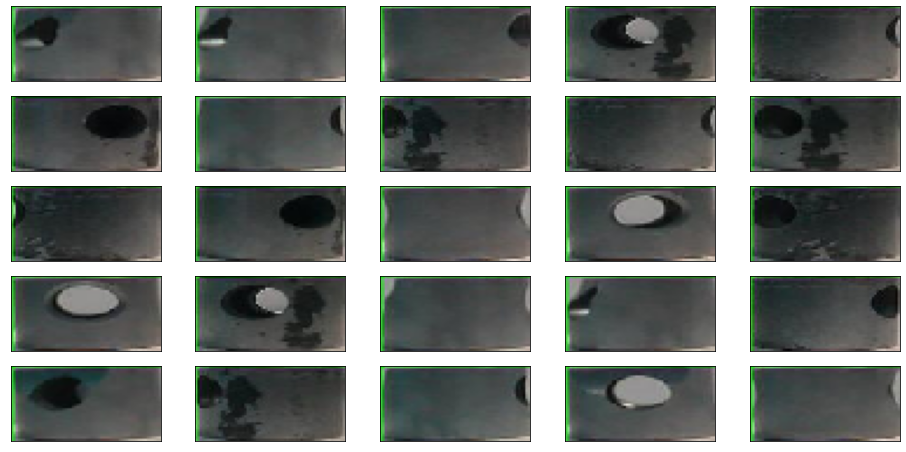

In [47]:
# This function plots images from a folder. 

import glob
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import random

def plot_images(source_path):
    files=[]
    classes = glob.glob(source_path + '/*')
    for class_path in classes:
        files.extend([f for f in glob.glob(class_path + "/*", recursive=True)])
    random.shuffle(files)
    plt.figure(figsize=(16, 8))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        img = image.load_img(files[i], target_size=(32, 64))
        plt.imshow(img, cmap=plt.cm.binary)
    plt.show()
    
plot_images('data/train_data')

In [48]:
IMG_HEIGHT = 80
IMG_WIDTH = 80

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_image_generator = ImageDataGenerator(rescale=1./255)
train_data_gen = train_image_generator.flow_from_directory(directory='data/train_data',
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 228 images belonging to 3 classes.


In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Dense(24, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    Flatten(),
    Dense(3),
    Dense(3)
])

In [50]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
              loss=CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 80, 80, 24)        96        
                                                                 
 flatten_4 (Flatten)         (None, 153600)            0         
                                                                 
 dense_13 (Dense)            (None, 3)                 460803    
                                                                 
 dense_14 (Dense)            (None, 3)                 12        
                                                                 
Total params: 460,911
Trainable params: 460,911
Non-trainable params: 0
_________________________________________________________________


In [51]:
history = model.fit_generator(train_data_gen, epochs=25)

Epoch 1/25


C:\Users\ANSni\AppData\Local\Temp/ipykernel_28112/1551119544.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data_gen, epochs=25)


8/8 [==============================] - 0s 18ms/step - loss: 5.2594 - accuracy: 0.4386
Epoch 2/25
8/8 [==============================] - 0s 19ms/step - loss: 2.8960 - accuracy: 0.4649
Epoch 3/25
8/8 [==============================] - 0s 18ms/step - loss: 2.8732 - accuracy: 0.4693
Epoch 4/25
8/8 [==============================] - 0s 19ms/step - loss: 0.9711 - accuracy: 0.5746
Epoch 5/25
8/8 [==============================] - 0s 19ms/step - loss: 0.5588 - accuracy: 0.7807
Epoch 6/25
8/8 [==============================] - 0s 19ms/step - loss: 0.4503 - accuracy: 0.8246
Epoch 7/25
8/8 [==============================] - 0s 20ms/step - loss: 0.2380 - accuracy: 0.9474
Epoch 8/25
8/8 [==============================] - 0s 20ms/step - loss: 0.2119 - accuracy: 0.9342
Epoch 9/25
8/8 [==============================] - 0s 20ms/step - loss: 0.1715 - accuracy: 0.9430
Epoch 10/25
8/8 [==============================] - 0s 19ms/step - loss: 0.1116 - accuracy: 0.9825
Epoch 11/25
8/8 [=======================

In [52]:
test_image_generator = ImageDataGenerator(rescale=1./255)
test_data_gen = test_image_generator.flow_from_directory(directory='data/test_data',
                                                         shuffle=False,
                                                         target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                         class_mode='categorical')

loss, accuracy = model.evaluate(test_data_gen)
print("loss: %f, accuracy: %f" % (loss, accuracy))

Found 57 images belonging to 3 classes.
2/2 [==============================] - 0s 10ms/step - loss: 0.1365 - accuracy: 1.0000
loss: 0.136486, accuracy: 1.000000


In [53]:
model_dir = './tensorflow'
model.save(model_dir)

INFO:tensorflow:Assets written to: ./tensorflow\assets
